# QF 627 Programming and Computational Finance
## `Py`Day Week `6` | Part `2`

#### Nothing can stop us 👋

In [1]:
# Causal Inference & Econometrics

## event --> treatment
## counterfactual --> control

# Confounders vs. Colliders

# Regression Discontinuity (Kernel Weights)

# Synthetic Control

# Frequentist vs. Bayesian 

# Bayesian Structural Time-Series (BSTS)

### DEFINE

### A Question: Does a clash of airplanes affect the value of Boeing's stock prices?

In [2]:
# !pip install causalimpact

In [3]:
from causalimpact import CausalImpact
import yfinance as yf

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
# March 10, 2019 (Sunday)

# Treatment Date: 2019-03-11 
# Treatment End: 10 days (tunable)

In [6]:
# Setting of Timeframes

treatment_start = "2019-03-11"
treatment_end = "2019-03-20"

control_start = "2018-12-03"
control_end = "2019-03-08" # Friday

stock_end = "2019-03-21"

### IMPORT

In [7]:
y = ["BA"]

y =\
(
    yf
    .download(tickers = y,
              interval = "1d",
              start = control_start,
              end = stock_end)
)

[*********************100%***********************]  1 of 1 completed


In [8]:
y

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,364.309998,369.000000,356.369995,359.959991,349.772003,6573400
2018-12-04,357.000000,358.320007,341.739990,342.500000,332.806183,5199100
2018-12-06,329.989990,333.630005,317.299988,331.899994,322.506165,9297400
2018-12-07,332.350006,337.609985,321.390015,323.220001,314.071808,4526300
2018-12-10,321.269989,327.200012,315.510010,326.350006,317.113281,4400500
...,...,...,...,...,...,...
2019-03-14,374.989990,380.390015,372.100006,373.299988,364.556702,13514100
2019-03-15,370.880005,385.709991,366.450012,378.989990,370.113464,26697700
2019-03-18,370.000000,373.070007,367.200012,372.279999,363.560638,13119200


In [9]:
# You may use domain knowledge (known correlated assets; securities)
# You should add random selection of securities

control_tickers =\
    ["AIR",
     "DE",
     "JD",
     "ZAL.DE",
     "CARL-B.CO",
     "SQ",
     "KTOS",
     "TRMB",
     "UAL",
     "GOOG"]

Xs =\
(
    yf
    .download(tickers = control_tickers,
              interval = "1d",
              start = control_start,
              end = stock_end)
)

[*********************100%***********************]  10 of 10 completed


### WRANGLE

In [10]:
Xs.tail()

Adj Close                                                        
                  AIR   CARL-B.CO          DE       GOOG         JD   KTOS   
Date                                                                         
2019-03-14  33.962372  733.205872  147.329453  59.277500  26.800529  15.84  \
2019-03-15  33.932594  736.257202  147.693665  59.223000  26.838968  15.46   
2019-03-18  34.875443  739.308411  149.701538  59.213001  27.040764  15.79   
2019-03-19  34.835739  742.898193  150.327179  59.942501  27.204124  15.91   
2019-03-20  32.920277  735.180298  149.103821  61.198502  26.983109  16.17   

                                                        ...     Volume   
                   SQ       TRMB        UAL     ZAL.DE  ...        AIR   
Date                                                    ...              
2019-03-14  77.379997  39.779999  81.489998  34.779999  ...   496700.0  \
2019-03-15  76.650002  39.759998  81.690002  35.000000  ...  1540000.0   
2019-03-18  75.230003  40.150002  80.730003  35.270000  ...   595200.0   
2019-03-19  76.809998  40.320000  81.339996  35.240002  ...   699500.0   
2019-03-20  75.260002  40.230000  79.830002  34.700001  ...  1190300.0   

                                                                     
           CARL-B.CO         DE        GOOG          JD       KTOS   
Date                                                                 
2019-03-14  233693.0  1596800.0  23456000.0  17280900.0   737900.0  \
2019-03-15  471595.0  2386300.0  49236000.0  16304000.0  3117300.0   
2019-03-18  229062.0  1962400.0  25852000.0  12513800.0   960000.0   
2019-03-19  225836.0  1685400.0  30414000.0  12356500.0  1228400.0   
2019-03-20  226537.0  2017100.0  44548000.0  12752400.0  1925300.0   

                                                        
                    SQ       TRMB        UAL    ZAL.DE  
Date                                                    
2019-03-14   6579200.0  1474200.0  1816200.0  888086.0  
2019-03-15   8485800.0  1692300.0  4860300.0  822118.0  
2019-03-18  12755300.0   895100.0  2780200.0  503299.0  
2019-03-19   8170900.0   863100.0  2390400.0  793710.0  
2019-03-20   9423000.0   729400.0  4660700.0  459426.0  

[5 rows x 60 columns]

In [11]:
Xs_CLEANED =\
(
    Xs
    .iloc[ : , :len(control_tickers),
         ]
)

In [12]:
Xs_CLEANED

Adj Close                                                        
                  AIR   CARL-B.CO          DE       GOOG         JD   KTOS   
Date                                                                         
2018-12-03  44.194576  639.826538  150.700546  55.321499  21.150221  13.42  \
2018-12-04  41.431179  645.269653  140.834030  52.541000  20.612097  12.81   
2018-12-05        NaN  640.880066         NaN        NaN        NaN    NaN   
2018-12-06  41.025082  625.428711  143.435394  53.436501  20.400690  13.74   
2018-12-07  40.529850  628.062500  136.811279  51.828999  20.112411  13.64   
...               ...         ...         ...        ...        ...    ...   
2019-03-14  33.962372  733.205872  147.329453  59.277500  26.800529  15.84   
2019-03-15  33.932594  736.257202  147.693665  59.223000  26.838968  15.46   
2019-03-18  34.875443  739.308411  149.701538  59.213001  27.040764  15.79   
2019-03-19  34.835739  742.898193  150.327179  59.942501  27.204124  15.91   
2019-03-20  32.920277  735.180298  149.103821  61.198502  26.983109  16.17   

                                                        
                   SQ       TRMB        UAL     ZAL.DE  
Date                                                    
2018-12-03  71.949997  39.240002  96.459999  27.740000  
2018-12-04  63.509998  37.060001  91.940002  26.950001  
2018-12-05        NaN        NaN        NaN  26.350000  
2018-12-06  65.690002  36.919998  93.029999  25.450001  
2018-12-07  60.779999  35.490002  88.230003  25.510000  
...               ...        ...        ...        ...  
2019-03-14  77.379997  39.779999  81.489998  34.779999  
2019-03-15  76.650002  39.759998  81.690002  35.000000  
2019-03-18  75.230003  40.150002  80.730003  35.270000  
2019-03-19  76.809998  40.320000  81.339996  35.240002  
2019-03-20  75.260002  40.230000  79.830002  34.700001  

[76 rows x 10 columns]

In [13]:
Xs_CLEANED.columns =\
    Xs_CLEANED \
    .columns \
    .droplevel()

Xs_CLEANED.columns

Index(['AIR', 'CARL-B.CO', 'DE', 'GOOG', 'JD', 'KTOS', 'SQ', 'TRMB', 'UAL',
       'ZAL.DE'],
      dtype='object')

In [14]:
Xs_CLEANED

,AIR,CARL-B.CO,DE,GOOG,JD,KTOS,SQ,TRMB,UAL,ZAL.DE
Date,,,,,,,,,,
2018-12-03,44.194576,639.826538,150.700546,55.321499,21.150221,13.42,71.949997,39.240002,96.459999,27.740000
2018-12-04,41.431179,645.269653,140.834030,52.541000,20.612097,12.81,63.509998,37.060001,91.940002,26.950001
2018-12-05,NaN,640.880066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.350000
2018-12-06,41.025082,625.428711,143.435394,53.436501,20.400690,13.74,65.690002,36.919998,93.029999,25.450001
2018-12-07,40.529850,628.062500,136.811279,51.828999,20.112411,13.64,60.779999,35.490002,88.230003,25.510000
...,...,...,...,...,...,...,...,...,...,...
2019-03-14,33.962372,733.205872,147.329453,59.277500,26.800529,15.84,77.379997,39.779999,81.489998,34.779999
2019-03-15,33.932594,736.257202,147.693665,59.223000,26.838968,15.46,76.650002,39.759998,81.690002,35.000000
2019-03-18,34.875443,739.308411,149.701538,59.213001,27.040764,15.79,75.230003,40.150002,80.730003,35.270000


In [15]:
Xs_CLEANED.index =\
    Xs_CLEANED \
    .index \
    .tz_localize(None)

In [16]:
y =\
(
    y
    ["Adj Close"]
    .rename("y")
)

In [17]:
data =\
(
    pd
    .concat([y, Xs_CLEANED],
            axis = 1)
    .dropna()
)

data

,y,AIR,CARL-B.CO,DE,GOOG,JD,KTOS,SQ,TRMB,UAL,ZAL.DE
Date,,,,,,,,,,,
2018-12-03,349.772003,44.194576,639.826538,150.700546,55.321499,21.150221,13.42,71.949997,39.240002,96.459999,27.740000
2018-12-04,332.806183,41.431179,645.269653,140.834030,52.541000,20.612097,12.81,63.509998,37.060001,91.940002,26.950001
2018-12-06,322.506165,41.025082,625.428711,143.435394,53.436501,20.400690,13.74,65.690002,36.919998,93.029999,25.450001
2018-12-07,314.071808,40.529850,628.062500,136.811279,51.828999,20.112411,13.64,60.779999,35.490002,88.230003,25.510000
2018-12-10,317.113281,40.460518,624.375244,136.597641,51.977501,19.708817,14.57,63.380001,35.650002,88.550003,25.440001
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-14,364.556702,33.962372,733.205872,147.329453,59.277500,26.800529,15.84,77.379997,39.779999,81.489998,34.779999
2019-03-15,370.113464,33.932594,736.257202,147.693665,59.223000,26.838968,15.46,76.650002,39.759998,81.690002,35.000000
2019-03-18,363.560638,34.875443,739.308411,149.701538,59.213001,27.040764,15.79,75.230003,40.150002,80.730003,35.270000


In [18]:
DF_for_control =\
    data[data.index <= control_end]

DF_for_control

,y,AIR,CARL-B.CO,DE,GOOG,JD,KTOS,SQ,TRMB,UAL,ZAL.DE
Date,,,,,,,,,,,
2018-12-03,349.772003,44.194576,639.826538,150.700546,55.321499,21.150221,13.420000,71.949997,39.240002,96.459999,27.740000
2018-12-04,332.806183,41.431179,645.269653,140.834030,52.541000,20.612097,12.810000,63.509998,37.060001,91.940002,26.950001
2018-12-06,322.506165,41.025082,625.428711,143.435394,53.436501,20.400690,13.740000,65.690002,36.919998,93.029999,25.450001
2018-12-07,314.071808,40.529850,628.062500,136.811279,51.828999,20.112411,13.640000,60.779999,35.490002,88.230003,25.510000
2018-12-10,317.113281,40.460518,624.375244,136.597641,51.977501,19.708817,14.570000,63.380001,35.650002,88.550003,25.440001
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-04,422.555695,34.934990,713.395996,154.856552,57.389999,27.761465,16.510000,74.690002,40.250000,84.309998,32.110001
2019-03-05,420.045898,34.954845,714.625183,150.775482,58.101501,28.203499,16.850000,76.040001,39.990002,85.050003,32.730000
2019-03-06,414.518463,34.061619,717.610107,147.777710,57.893002,27.896000,16.620001,75.139999,39.389999,84.330002,34.130001


In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
pvalue = adfuller(x = DF_for_control.y)

In [21]:
pvalue[1] < 0.05

False

In [22]:
differencing =\
(
    DF_for_control
    .pct_change()
    .dropna()
)

differencing

,y,AIR,CARL-B.CO,DE,GOOG,JD,KTOS,SQ,TRMB,UAL,ZAL.DE
Date,,,,,,,,,,,
2018-12-04,-0.048505,-0.062528,0.008507,-0.065471,-0.050261,-0.025443,-0.045455,-0.117304,-0.055556,-0.046859,-0.028479
2018-12-06,-0.030949,-0.009802,-0.030748,0.018471,0.017044,-0.010256,0.072599,0.034325,-0.003778,0.011856,-0.055659
2018-12-07,-0.026153,-0.012071,0.004211,-0.046182,-0.030082,-0.014131,-0.007278,-0.074745,-0.038732,-0.051596,0.002358
2018-12-10,0.009684,-0.001711,-0.005871,-0.001562,0.002865,-0.020067,0.068182,0.042777,0.004508,0.003627,-0.002744
2018-12-11,-0.013237,-0.002693,0.010967,-0.000204,0.011736,0.019503,0.005491,-0.025245,-0.015147,-0.004630,0.026730
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-04,-0.017997,-0.037462,0.010194,0.015370,0.005968,0.005569,-0.011969,-0.035760,-0.005436,-0.030028,-0.019542
2019-03-05,-0.005940,0.000568,0.001723,-0.026354,0.012398,0.015923,0.020594,0.018075,-0.006460,0.008777,0.019309
2019-03-06,-0.013159,-0.025554,0.004177,-0.019882,-0.003589,-0.010903,-0.013650,-0.011836,-0.015004,-0.008466,0.042774


### EDA

In [23]:
import seaborn as sns

In [24]:
%whos

Variable          Type         Data/Info
----------------------------------------
CausalImpact      type         <class 'causalimpact.analysis.CausalImpact'>
DF_for_control    DataFrame                         y   <...>n\n[62 rows x 11 columns]
Xs                DataFrame                Adj Close    <...>n\n[76 rows x 60 columns]
Xs_CLEANED        DataFrame                      AIR   C<...>n\n[76 rows x 10 columns]
adfuller          function     <function adfuller at 0x7fa3ca63bac0>
control_end       str          2019-03-08
control_start     str          2018-12-03
control_tickers   list         n=10
data              DataFrame                         y   <...>n\n[70 rows x 11 columns]
differencing      DataFrame                       y     <...>n\n[61 rows x 11 columns]
np                module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt               module       <module 'matp

<Axes: >

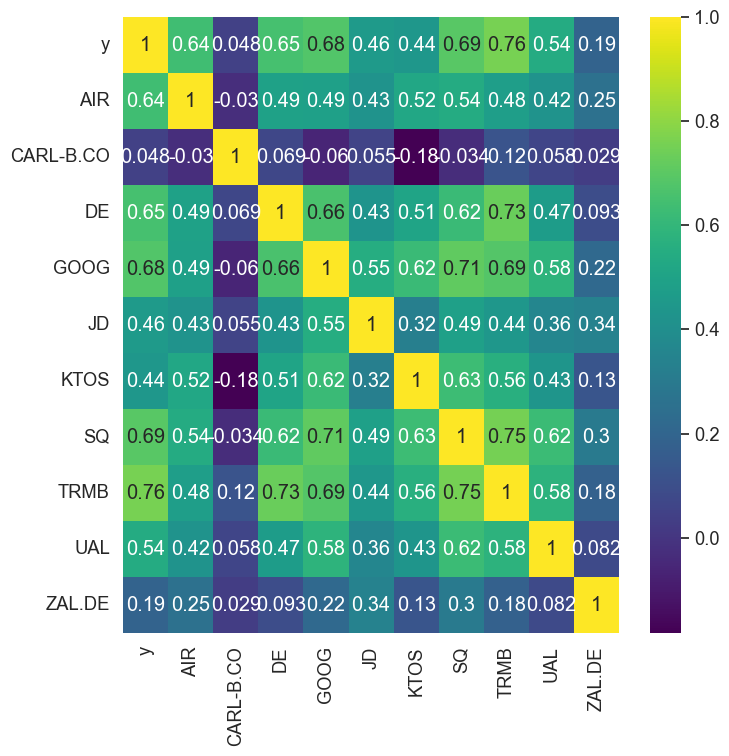

In [25]:
(
    plt
    .figure(figsize = [8, 8]
           )
)

(
    sns
    .set(font_scale = 1.2)
)

(
    sns
    .heatmap(differencing.corr(),
             cmap = "viridis",
             annot = True)
)

In [26]:
# Benchmark for dropping (r < 0.50)

DF_CLEANED =\
    data \
    .drop(columns = ["CARL-B.CO",
                     "ZAL.DE",
                     "KTOS",
                     "JD"]
         )

In [27]:
DF_CLEANED.columns.to_frame()

,0
y,y
AIR,AIR
DE,DE
GOOG,GOOG
SQ,SQ
TRMB,TRMB
UAL,UAL


In [28]:
DF_CLEANED =\
    DF_CLEANED \
    .dropna()

In [29]:
# Prepare data for BSTS [pre vs. post events]

In [30]:
period_BEFORE =\
    [control_start, control_end]

period_AFTER =\
    [treatment_start, treatment_end]

### MODEL

In [31]:
%whos

Variable          Type         Data/Info
----------------------------------------
CausalImpact      type         <class 'causalimpact.analysis.CausalImpact'>
DF_CLEANED        DataFrame                         y   <...>\n\n[70 rows x 7 columns]
DF_for_control    DataFrame                         y   <...>n\n[62 rows x 11 columns]
Xs                DataFrame                Adj Close    <...>n\n[76 rows x 60 columns]
Xs_CLEANED        DataFrame                      AIR   C<...>n\n[76 rows x 10 columns]
adfuller          function     <function adfuller at 0x7fa3ca63bac0>
control_end       str          2019-03-08
control_start     str          2018-12-03
control_tickers   list         n=10
data              DataFrame                         y   <...>n\n[70 rows x 11 columns]
differencing      DataFrame                       y     <...>n\n[61 rows x 11 columns]
np                module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                module       <module 'pand

In [32]:
# Team, we will use built-in functions from package (API) that was built by GOOGLE

# ATE = Average Treatment Effects

ATE =\
    CausalImpact(data = DF_CLEANED,
                 pre_period = period_BEFORE,
                 post_period = period_AFTER)

In [33]:
type(ATE)

causalimpact.analysis.CausalImpact

In [34]:
dir(ATE)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_align_periods_dtypes',
 '_check_periods_are_valid',
 '_check_valid_alpha',
 '_check_valid_args_combo',
 '_format_input',
 '_format_input_data',
 '_format_input_prepost',
 '_print_report',
 '_run_with_data',
 '_run_with_ucm',
 'data',
 'inferences',
 'model',
 'params',
 'plot',
 'results',
 'run',
 'series',
 'summary']

In [35]:
ATE.run()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88357D-01    |proj g|=  9.79998D-01

At iterate    5    f= -7.13865D-01    |proj g|=  6.74265D-01

At iterate   10    f= -8.40260D-01    |proj g|=  1.79970D-01

At iterate   15    f= -8.49528D-01    |proj g|=  1.24985D-01

At iterate   20    f= -8.49909D-01    |proj g|=  5.23589D-03

At iterate   25    f= -8.49909D-01    |proj g|=  3.92001D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     42      1     0     0   

 This problem is unconstrained.


In [36]:
ATE.summary() # causal impact summary 
              # [Actual denotes prices of Boeing After the events] Y (Observation)
              # [Predicted denotes prices of Boeing under Counterfactual] Y-hat (Estimated)

                                Average       Cumulative
Actual                              369             2955
Predicted                           424             3392
95% CI                       [407, 441]     [3256, 3529]
                                                        
Absolute Effect                     -54             -436
95% CI                       [-37, -71]     [-300, -573]
                                                        
Relative Effect                  -12.9%           -12.9%
95% CI                  [-8.9%, -16.9%]  [-8.9%, -16.9%]
                                                        
P-value                            0.0%                 
Prob. of Causal Effect           100.0%                 


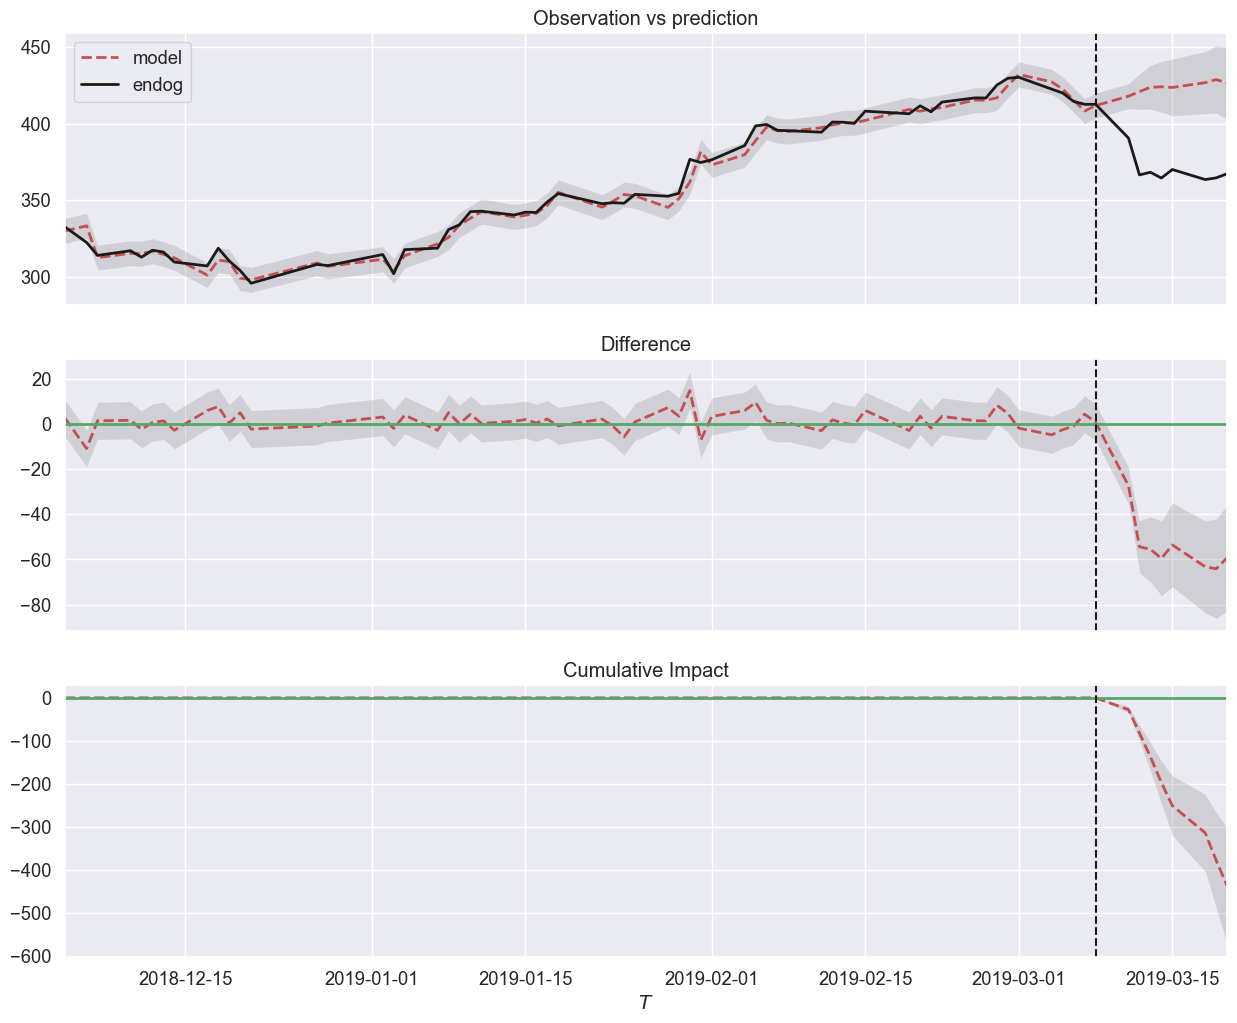

In [37]:
ATE.plot()

### REPORT

In [38]:
ATE.summary(output = "report")

During the post-intervention period, the response             variable had an average value of             approx. 369.
By contrast, in  the absence of an intervention, we would have expected an average response of 424. The 95% interval of
this counterfactual prediction is [407, 441]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is -54 with a 95% interval of [-37,
-71]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 2955.  By contrast, had  the intervention not taken place,
we would have expected a sum of 3392. The 95% interval of this prediction is [3256, 3529]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  a decrease
of  -

> Team, it was great seeing you tonight at `Py`Day! Wishing you a hap`PY` October &#128578;